<a target="_blank" href="https://colab.research.google.com/github/wbfrench1/stock/blob/main/src/get_stock_data.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [7]:
import pandas as pd
import numpy as np
import yfinance as yf
#from yahoofinance import HistoricalPrices
import json
import seaborn as sns
from matplotlib import pyplot as plt

# Plan

1. Pull one stocks data
1. Get Data over a specified period of time and interval
1. Graph stock data over time period
1. Get s&p500 stock tickers
1. Get Multiple Ticker Data

# Next Steps

1. Try different methods of getting multiple ticker data
1. find stocks that have dropped 40% or more in time period
1. make a bag of functions

# Graph Historical Performance

### Pull one stocks data

In [8]:
msft = yf.Ticker("MSFT")
str_period = '5y'
str_interval = '1mo'

### Get Data over a specified period of time and interval

In [9]:
msft.history(period=str_period,
             interval=str_interval).head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-08-01 00:00:00-04:00,100.282934,106.667069,99.157432,106.241463,456628100,0.42,0.0
2018-09-01 00:00:00-04:00,105.245149,109.460654,101.808190,108.587173,480255500,0.00,0.0
2018-10-01 00:00:00-04:00,108.947952,110.305648,95.048188,101.409416,927548000,0.00,0.0
2018-11-01 00:00:00-04:00,101.637283,106.564858,94.326610,105.283119,720228600,0.46,0.0
2018-12-01 00:00:00-05:00,107.749928,108.150413,89.594541,96.850975,944314600,0.00,0.0


In [10]:
msft.info['longName']

'Microsoft Corporation'

In [11]:
msft.info.keys()

dict_keys(['address1', 'city', 'state', 'zip', 'country', 'phone', 'fax', 'website', 'industry', 'industryDisp', 'sector', 'longBusinessSummary', 'fullTimeEmployees', 'companyOfficers', 'auditRisk', 'boardRisk', 'compensationRisk', 'shareHolderRightsRisk', 'overallRisk', 'governanceEpochDate', 'compensationAsOfEpochDate', 'maxAge', 'priceHint', 'previousClose', 'open', 'dayLow', 'dayHigh', 'regularMarketPreviousClose', 'regularMarketOpen', 'regularMarketDayLow', 'regularMarketDayHigh', 'dividendRate', 'dividendYield', 'exDividendDate', 'payoutRatio', 'fiveYearAvgDividendYield', 'beta', 'trailingPE', 'forwardPE', 'volume', 'regularMarketVolume', 'averageVolume', 'averageVolume10days', 'averageDailyVolume10Day', 'bid', 'ask', 'bidSize', 'askSize', 'marketCap', 'fiftyTwoWeekLow', 'fiftyTwoWeekHigh', 'priceToSalesTrailing12Months', 'fiftyDayAverage', 'twoHundredDayAverage', 'trailingAnnualDividendRate', 'trailingAnnualDividendYield', 'currency', 'enterpriseValue', 'profitMargins', 'floatSh

### Graph stock data over time period

[Text(0.5, 1.0, 'Microsoft Corporation')]

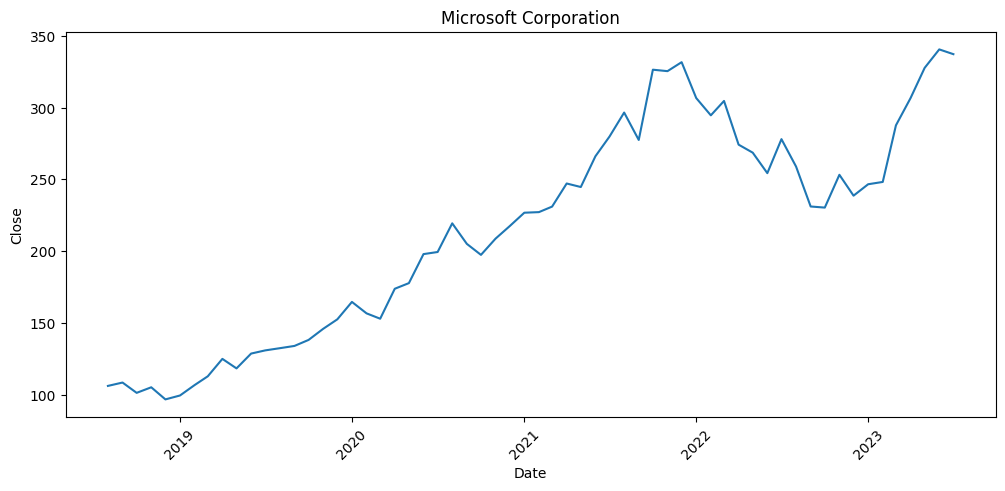

In [12]:
t_figsize = (12,5)
fig, ax = plt.subplots(figsize=t_figsize)
plt.xticks(rotation=45)
sns.lineplot(x= msft.history(period=str_period,
                             interval=str_interval).index,
             y= msft.history(period=str_period,
                             interval=str_interval)['Close'],
             ax= ax).set(title= msft.info['longName'])

In [13]:
msft.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-06-08 00:00:00-04:00,323.940002,326.640015,323.350006,325.260010,23277700,0.0,0.0
2023-06-09 00:00:00-04:00,324.989990,329.989990,324.410004,326.790009,22514900,0.0,0.0
2023-06-12 00:00:00-04:00,328.579987,332.100006,325.160004,331.850006,24260300,0.0,0.0
2023-06-13 00:00:00-04:00,334.470001,336.980011,330.390015,334.290009,22951300,0.0,0.0
2023-06-14 00:00:00-04:00,334.339996,339.040009,332.809998,337.339996,26003800,0.0,0.0
2023-06-15 00:00:00-04:00,337.480011,349.839996,337.200012,348.100006,38899100,0.0,0.0
2023-06-16 00:00:00-04:00,351.320007,351.470001,341.950012,342.329987,46533600,0.0,0.0
2023-06-20 00:00:00-04:00,339.309998,342.079987,335.859985,338.049988,26375400,0.0,0.0
2023-06-21 00:00:00-04:00,336.369995,337.730011,332.070007,333.559998,25117800,0.0,0.0


In [14]:
msft.info['open']

339.32

# Get s&p500 stock tickers

In [15]:
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df_sp500_co_info = table[0]
df_sp500_co_info.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [16]:
df_sp500_co_info['Symbol']

0       MMM
1       AOS
2       ABT
3      ABBV
4       ACN
       ... 
498     YUM
499    ZBRA
500     ZBH
501    ZION
502     ZTS
Name: Symbol, Length: 503, dtype: object

https://www.marketdata.app/how-to-use-the-yahoo-finance-api/

# Get Multiple Ticker Data

## Put S&P 500 tickers into a string

In [36]:
# If the below download fails, then it might be because of the replacement of . with -
str_sp500_stk_tkrs= ' '.join(i if '.' not in i else i.replace('.','-') for i in df_sp500_co_info['Symbol'])
print('Number of tickers in sp500:', len(df_sp500_co_info['Symbol']), '\n')
str_sp500_stk_tkrs

Number of tickers in sp500: 503 



'MMM AOS ABT ABBV ACN ATVI ADM ADBE ADP AAP AES AFL A APD AKAM ALK ALB ARE ALGN ALLE LNT ALL GOOGL GOOG MO AMZN AMCR AMD AEE AAL AEP AXP AIG AMT AWK AMP ABC AME AMGN APH ADI ANSS AON APA AAPL AMAT APTV ACGL ANET AJG AIZ T ATO ADSK AZO AVB AVY AXON BKR BALL BAC BBWI BAX BDX WRB BRK-B BBY BIO TECH BIIB BLK BK BA BKNG BWA BXP BSX BMY AVGO BR BRO BF-B BG CHRW CDNS CZR CPT CPB COF CAH KMX CCL CARR CTLT CAT CBOE CBRE CDW CE CNC CNP CDAY CF CRL SCHW CHTR CVX CMG CB CHD CI CINF CTAS CSCO C CFG CLX CME CMS KO CTSH CL CMCSA CMA CAG COP ED STZ CEG COO CPRT GLW CTVA CSGP COST CTRA CCI CSX CMI CVS DHI DHR DRI DVA DE DAL XRAY DVN DXCM FANG DLR DFS DIS DG DLTR D DPZ DOV DOW DTE DUK DD DXC EMN ETN EBAY ECL EIX EW EA ELV LLY EMR ENPH ETR EOG EPAM EQT EFX EQIX EQR ESS EL ETSY RE EVRG ES EXC EXPE EXPD EXR XOM FFIV FDS FICO FAST FRT FDX FITB FSLR FE FIS FI FLT FMC F FTNT FTV FOXA FOX BEN FCX GRMN IT GEHC GEN GNRC GD GE GIS GM GPC GILD GL GPN GS HAL HIG HAS HCA PEAK HSIC HSY HES HPE HLT HOLX HD HON HRL HST

## Query Multiple Tickers

In [31]:
data = yf.download(str_sp500_stk_tkrs, start="2018-01-01", end="2023-07-09")

[*********************100%***********************]  503 of 503 completed

ERROR:yfinance:
2 Failed downloads:


ERROR:yfinance:['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-01-01 -> 2023-07-09)')
ERROR:yfinance:['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [32]:
print('data.shape:', data.shape)
data.head(5)

data.shape: (1387, 3018)


Adj Close                                               \
                             A        AAL         AAP       AAPL       ABBV   
Date                                                                          
2018-01-02 00:00:00  64.865402  51.647568   98.501434  40.831596  76.580681   
2018-01-03 00:00:00  66.515831  51.014023   99.392807  40.824471  77.779076   
2018-01-04 00:00:00  66.016846  51.335667  103.060249  41.014107  77.335510   
2018-01-05 00:00:00  67.072334  51.316177  104.155846  41.481071  78.681770   
2018-01-08 00:00:00  67.216278  50.809353  103.422340  41.326996  77.421112   

                                                                              \
                           ABC        ABT       ACGL         ACN        ADBE   
Date                                                                           
2018-01-02 00:00:00  86.158249  53.636837  29.433332  141.986389  177.699997   
2018-01-03 00:00:00  86.478912  53.755436  29.459999  142.641708  181.039993   
2018-01-04 00:00:00  86.286530  53.664204  29.570000  144.330688  183.220001   
2018-01-05 00:00:00  87.330963  53.819313  29.453333  145.521332  185.339996   
2018-01-08 00:00:00  88.778542  53.664204  29.456667  146.684189  185.039993   

                     ...   Volume                                      \
                     ...     WYNN      XEL       XOM     XRAY     XYL   
Date                 ...                                                
2018-01-02 00:00:00  ...  2581200  2443400  11469300  1622300  877800   
2018-01-03 00:00:00  ...  3530900  4114900  13957700  1533300  778800   
2018-01-04 00:00:00  ...  2708800  2807000  10863000  1052400  796500   
2018-01-05 00:00:00  ...  2186600  3728000  11047600  1329000  666800   
2018-01-08 00:00:00  ...  1803800  3837600  10927100  1188500  554700   

                                                                 
                         YUM      ZBH    ZBRA     ZION      ZTS  
Date                                                             
2018-01-02 00:00:00  1747800  1818259  310600  2387100  2135600  
2018-01-03 00:00:00  2554900  1368664  253000  1575700  2328200  
2018-01-04 00:00:00  1971200  1105396  435200  3309200  2534000  
2018-01-05 00:00:00  1927100  1095302  301800  1212200  2166100  
2018-01-08 00:00:00  1599400  1286985  218600  1697700  3631400  

[5 rows x 3018 columns]

## Create Min/Max Current DataFrame

In [55]:
# Show period low, high, current
df_min_max = pd.concat([pd.DataFrame(data['Adj Close'].min(),
                        columns=['Min_StkPr']
                        ),
           pd.DataFrame(data['Adj Close'].max(),
                   columns=['Max_StkPr'])], axis=1)
df_min_max.head()

,Min_StkPr,Max_StkPr
A,58.797661,177.025650
AAL,9.040000,56.988731
AAP,63.580002,230.368698
AAPL,34.209961,193.970001
ABBV,53.025333,167.007935
